In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pathlib
import pickle

# Leitura de Dados

O arquivo de dados é muito grande, fazendo com que carregá-lo seja custoso. Para reduzir um pouco isso, podemos optar por carregar apenas as colunas de interesse.

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)

/home/jupyter/notebooks/projeto/data


In [3]:
RAW_DATA_DIR = DATA_DIR / 'raw'
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)
print(RAW_DATA_DIR)

/home/jupyter/notebooks/projeto/data/raw


In [4]:
RAW_DATA_FILE_PATH = DATA_DIR / 'raw' / 'MICRODADOS_ENEM_2021.csv'
print(RAW_DATA_FILE_PATH)

/home/jupyter/notebooks/projeto/data/raw/MICRODADOS_ENEM_2021.csv


In [5]:
trial_data = pd.read_csv(RAW_DATA_FILE_PATH, 
            encoding='latin-1', 
            sep=';',  
            nrows=1)
trial_data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Utilizarão-se as questões ordinais do questionário socioeconômico para entender melhor como vivem cada um dos candidatos

In [6]:
variaveis_de_interesse = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
                          'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                          'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                          'Q001', 'Q002','Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 
                          'Q012', 'Q013','Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024'
                         ]

In [7]:
# Carregando arquivo inteiro
raw_data = pd.read_csv(RAW_DATA_FILE_PATH, 
            usecols = variaveis_de_interesse,
            encoding='latin-1', 
            sep=';')

In [8]:
raw_data = raw_data.dropna()

In [9]:
raw_data.head(5)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q019,Q022,Q024
1,210052384164,12,M,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,A,B,A,A,A,A,A,B,C,A
3,210052128335,3,M,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,...,A,B,A,A,A,A,A,B,B,B
4,210051353021,2,F,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,A,B,A,B,A,B,A,B,E,B
8,210053417016,8,F,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,...,A,B,A,A,A,B,A,B,B,A
9,210051128744,4,F,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,...,A,B,B,C,A,B,A,C,C,A


## Normalizando pela mesma prova

Para conseguir comparar as respostas entre os candidatos, todos eles tem que ter feito o mesmo tipo de prova. Nesse caso, selecionamos todos os candidatos que fizeram o mesmo tipo de prova que o candidato número 1 (NU_INSCRICAO = 210052384164)

In [10]:
gabarito_CN = raw_data.iloc[0]['TX_GABARITO_CN']
gabarito_CH = raw_data.iloc[0]['TX_GABARITO_CH']
gabarito_LC = raw_data.iloc[0]['TX_GABARITO_LC']
gabarito_MT = raw_data.iloc[0]['TX_GABARITO_MT']

In [11]:
data = raw_data.loc[raw_data['TX_GABARITO_CN'] == gabarito_CN]
data = data.loc[data['TX_GABARITO_CH'] == gabarito_CH]
data = data.loc[data['TX_GABARITO_LC'] == gabarito_LC]
data = data.loc[data['TX_GABARITO_MT'] == gabarito_MT]

In [12]:
data.head(5)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q019,Q022,Q024
1,210052384164,12,M,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,A,B,A,A,A,A,A,B,C,A
4,210051353021,2,F,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,A,B,A,B,A,B,A,B,E,B
18,210054206376,2,F,CCEBDBDBAEDECDDBCDACCDEDDAAEAEDAEABBCDCEBECAB,DEECECBAEAACDBCDCBABABACABACCDADBBAEDECACDDBB,99999CBBDEEEBAECBDAABACABCBAADABBDABBAADDCDAAB...,BCEDECBCDBDBCBACDBEBBCEEAEDABAABCDCABDBDCCBEE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,B,B,A,A,A,A,A,B,C,A
21,210052118573,3,F,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,A,B,A,B,B,B,A,B,B,B
24,210052019575,1,F,ADDBEABAECBCCADBEECBEDADDABACEEADCBDECDAACBCD,BADBECEAACDABACBAEEDCEBEADCABECEDAEEBAAECBEDC,99999EDAACDABCBBBDADABEDCBEADEDBBCDDEBBCADECAE...,EACEEDBCAADDCBEBAECADBEECEDCACCEABAADBEACEACB,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,...,B,B,A,A,A,A,A,B,C,A


## Tratando tipo de dados

Vamos dar uma olhada nos tipos de dados

In [13]:
data.dtypes

NU_INSCRICAO         int64
TP_FAIXA_ETARIA      int64
TP_SEXO             object
TX_RESPOSTAS_CN     object
TX_RESPOSTAS_CH     object
TX_RESPOSTAS_LC     object
TX_RESPOSTAS_MT     object
TX_GABARITO_CN      object
TX_GABARITO_CH      object
TX_GABARITO_LC      object
TX_GABARITO_MT      object
Q001                object
Q002                object
Q005               float64
Q006                object
Q007                object
Q008                object
Q009                object
Q010                object
Q011                object
Q012                object
Q013                object
Q014                object
Q015                object
Q016                object
Q017                object
Q019                object
Q022                object
Q024                object
dtype: object

Todos os tipos `object` são na verdade `strings`. Vamos mudar isso.

In [14]:
# Mudando tipo de argumento
data_right_types = data.copy()
colunas_string = ['TP_SEXO',
                  'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                  'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                  'Q001', 'Q002', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
                  'Q013','Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024'
                 ]
for col in colunas_string:
    data_right_types[col] = data[col].astype('string')

In [15]:
data_right_types.dtypes

NU_INSCRICAO         int64
TP_FAIXA_ETARIA      int64
TP_SEXO             string
TX_RESPOSTAS_CN     string
TX_RESPOSTAS_CH     string
TX_RESPOSTAS_LC     string
TX_RESPOSTAS_MT     string
TX_GABARITO_CN      string
TX_GABARITO_CH      string
TX_GABARITO_LC      string
TX_GABARITO_MT      string
Q001                string
Q002                string
Q005               float64
Q006                string
Q007                string
Q008                string
Q009                string
Q010                string
Q011                string
Q012                string
Q013                string
Q014                string
Q015                string
Q016                string
Q017                string
Q019                string
Q022                string
Q024                string
dtype: object

# Tratamento de Dados

## 1. Retirando respostas para parte de Línguas Estrangeiras

Uma coisa estranha nesse conjunto de dados é a coluna 'TX_RESPOSTAS_LC'. Veja que os candidatos possuem uma série de '9's ou nas primeiras 5 questões ou nas 5 seguintes. Isso ocorre pois a prova de Linguagens e Códigos possuem 5 questões a respeito de uma língua estrangeira à escolha dos candidatos, logo existem questões que eles não precisam responder (asssinaladas com 9).

Para normalizar os dados, escolheu-se remover essas 10 primeiras questões.

In [16]:
data_right_types['TX_RESPOSTAS_LC'] = data_right_types['TX_RESPOSTAS_LC'].str[10:]
data_right_types['TX_GABARITO_LC'] = data_right_types['TX_GABARITO_LC'].str[10:]

In [17]:
len(data_right_types['TX_RESPOSTAS_LC'].iloc[0]), len(data_right_types['TX_GABARITO_LC'].iloc[0])

(40, 40)

Também vamos juntar as colunas de respostas e gabarito para facilitar a visualização

In [18]:
data_right_types['Gabarito'] = (data_right_types['TX_RESPOSTAS_LC'] + 
                                data_right_types['TX_RESPOSTAS_CH'] + 
                                data_right_types['TX_RESPOSTAS_CN'] + 
                                data_right_types['TX_RESPOSTAS_MT'])

In [19]:
data_right_types['Gabarito Oficial'] = (data_right_types['TX_GABARITO_LC'] + 
                                        data_right_types['TX_GABARITO_CH'] + 
                                        data_right_types['TX_GABARITO_CN'] + 
                                        data_right_types['TX_GABARITO_MT'])

Não usamos mais os tipos de prova. Vamos dropar essas colunas.

In [20]:
data_right_types = data_right_types.drop(columns = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
                                                    'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 
                                                    'TX_GABARITO_CN', 'TX_GABARITO_MT', 
                                                    'TX_GABARITO_CH', 'TX_GABARITO_LC'])

In [21]:
data_right_types.head(5)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,Q013,Q014,Q015,Q016,Q017,Q019,Q022,Q024,Gabarito,Gabarito Oficial
1,210052384164,12,M,B,B,3.0,B,A,B,C,...,A,A,A,A,A,B,C,A,EEBACDABACBECBBCDBDEBDDCCCDECCDDCCCCDBCEECCDAA...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...
4,210051353021,2,F,D,E,4.0,C,A,B,C,...,A,B,A,B,A,B,E,B,DCBECCABADBEDADCDADDCDDECABAADEBBDACBCEECAE.AC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...
18,210054206376,2,F,B,B,4.0,B,A,B,C,...,A,A,A,A,A,B,C,A,EEBAECBDAABACABCBAADABBDABBAADDCDAABBCDADEECEC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...
21,210052118573,3,F,B,F,3.0,G,A,B,C,...,A,B,B,B,A,B,B,B,DDAAEBBDCDBBAABDECAADAEACCDABCEABABEABEAAAEADC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...
24,210052019575,1,F,H,E,4.0,C,A,B,B,...,A,A,A,A,A,B,C,A,DABCBBBDADABEDCBEADEDBBCDDEBBCADECAECBDABADBEC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...


## 2. Tratando quantidade de pessoas na residência

Outra coisa interessante é a questão 5 do questionário socioeconômico. Trata-se da pergunta `Incluindo você, quantas pessoas moram atualmente em sua residência?`, o que pode ser respondido com um número entre 1 (moro sozinho) e 20 (moro com outras 19 pessoas).
Vamos dar uma analisada na distribuição de respostas para essa pergunta.

array([[<AxesSubplot: title={'center': 'Q005'}>]], dtype=object)

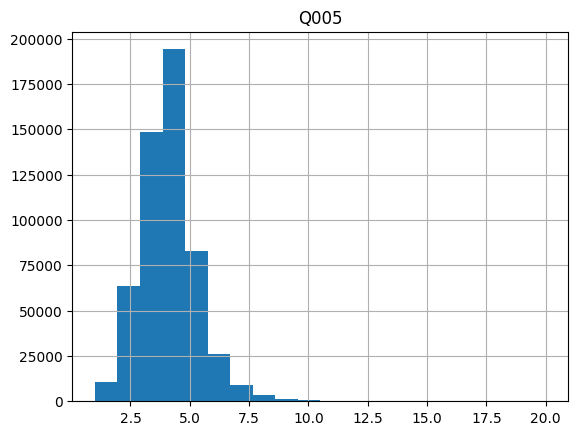

In [22]:
data_right_types.hist(column='Q005', bins=20)

Optamos por agrupar a extremidade direita para facilitar análises futuras. Além disso, vamos transformar as respostas em alternativas alfabéticas para poder concatenar todas as respostas em uma só string.

In [23]:
def number_to_letter(num):
    num_int = int(num)
    match num_int:
        case 1:
            return 'A'
        case 2:
            return 'B'
        case 3:
            return 'C'
        case 4:
            return 'D'
        case 5:
            return 'E'
        case 6:
            return 'F'
        case _:
            return 'E'

In [24]:
data_right_types['Q005_str'] = data_right_types['Q005'].apply(number_to_letter)

In [25]:
# Também temos que mudar o tipo de dado do Q005_str pra string
data_right_types['Q005_str'] = data_right_types['Q005_str'].astype('string')

## 3. Tratando Salário da Família

Uma coluna que também pode ser problemática no futuro é a `Q006`. Trata-se da pergunta `Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)`. Isso pode ser problemático porque as respostas variam de A até Q, o que pode dificultar na montagem de uma das redes.

<AxesSubplot: >

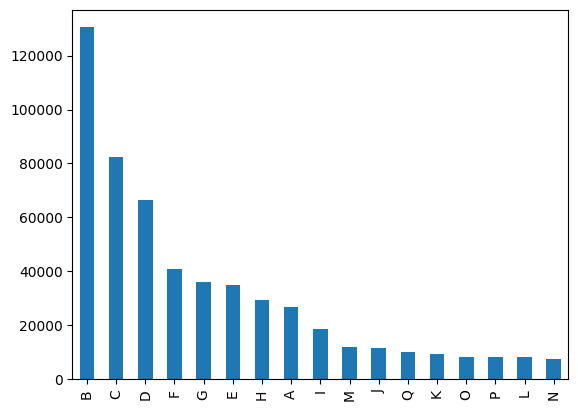

In [26]:
value_counts = data_right_types['Q006'].value_counts()

value_counts.plot(kind='bar')

Como a distribuição dessa alternativa é mais bem distribuida, optamos por mantê-la desse jeito

Para facilitar a comparação entre as respostas socioeconômicas, também é interessante juntá-las em uma só `string`

In [27]:
data_right_types.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'Q001', 'Q002', 'Q005',
       'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024', 'Gabarito',
       'Gabarito Oficial', 'Q005_str'],
      dtype='object')

In [28]:
data_right_types['Respostas Questionario'] = data_right_types['Q005_str']

In [29]:
questoes_questionario = ['Q001', 'Q002', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
                         'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024']

In [30]:
for column in questoes_questionario:
    data_right_types['Respostas Questionario'] = data_right_types['Respostas Questionario'] + data_right_types[column]

In [31]:
data_right_types.head(5)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,Q015,Q016,Q017,Q019,Q022,Q024,Gabarito,Gabarito Oficial,Q005_str,Respostas Questionario
1,210052384164,12,M,B,B,3.0,B,A,B,C,...,A,A,A,B,C,A,EEBACDABACBECBBCDBDEBDDCCCDECCDDCCCCDBCEECCDAA...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,C,CBBBABCAABAAAAABCA
4,210051353021,2,F,D,E,4.0,C,A,B,C,...,A,B,A,B,E,B,DCBECCABADBEDADCDADDCDDECABAADEBBDACBCEECAE.AC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DDECABCAABABABABEB
18,210054206376,2,F,B,B,4.0,B,A,B,C,...,A,A,A,B,C,A,EEBAECBDAABACABCBAADABBDABBAADDCDAABBCDADEECEC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DBBBABCABBAAAAABCA
21,210052118573,3,F,B,F,3.0,G,A,B,C,...,B,B,A,B,B,B,DDAAEBBDCDBBAABDECAADAEACCDABCEABABEABEAAAEADC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,C,CBFGABCBABABBBABBB
24,210052019575,1,F,H,E,4.0,C,A,B,B,...,A,A,A,B,C,A,DABCBBBDADABEDCBEADEDBBCDDEBBCADECAECBDABADBEC...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DHECABBABBAAAAABCA


In [32]:
print(len(data_right_types['Respostas Questionario'].iloc[0]), len(questoes_questionario))

18 17


## Corrigindo todas as provas

In [33]:
gabarito_oficial = data_right_types['Gabarito Oficial'].iloc[0]
gabarito_oficial

'DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEABDABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABDCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE'

In [40]:
def corrige_prova(respostas):
    i = 0
    for questao in range(len(gabarito_oficial)):
        if gabarito_oficial[questao] == respostas[questao]:
            i+=1
    return i

In [45]:
data_right_types['Acertos Totias'] = data_right_types.apply(lambda x: corrige_prova(x['Gabarito']), axis=1)

## 4. Separação entre questões de conhecimento específico e geral

Vimos manualmente quais questões de prova são de conhecimento geral e quais são de conhecimento específico (no sentido de ser necessário atender à escola para ter acesso ao conhecimento em questão). Essas informações estão dispostas em um arquivo `txt` no diretório `data`.

In [47]:
with open(DATA_DIR / 'divisao_perguntas' / 'Geral.txt') as f:
    linhas_questao = f.readlines()

Vamos dar uma olhada em como está esse documento

In [48]:
linhas_questao

['Q6: G\n',
 'Q7: G\n',
 'Q8: G \n',
 'Q9: G\n',
 'Q10: G\n',
 'Q11: G\n',
 'Q12: G\n',
 'Q13: G\n',
 'Q14: G\n',
 'Q15: G\n',
 'Q16: G \n',
 'Q17: G\n',
 'Q18: G \n',
 'Q19: G\n',
 'Q20: G \n',
 'Q21: E \n',
 'Q22: G\n',
 'Q23: G\n',
 'Q24: G\n',
 'Q25: G\n',
 'Q26: G \n',
 'Q27: G\n',
 'Q28: G\n',
 'Q29: E\n',
 'Q30: G\n',
 'Q31: G\n',
 'Q32: G\n',
 'Q33: G\n',
 'Q34: G\n',
 'Q35: G\n',
 'Q36: G\n',
 'Q37: G\n',
 'Q38: G\n',
 'Q39: E\n',
 'Q40: G\n',
 'Q41: E\n',
 'Q42: G\n',
 'Q43: G \n',
 'Q44: G \n',
 'Q45: G \n',
 'Q46: G\n',
 'Q47: E\n',
 'Q48: G\n',
 'Q49: G\n',
 'Q50: G\n',
 'Q51: E\n',
 'Q52: E\n',
 'Q53: G\n',
 'Q54: G\n',
 'Q55: G \n',
 'Q56: E\n',
 'Q57: G\n',
 'Q58: E\n',
 'Q59: G\n',
 'Q60: G\n',
 'Q61: G\n',
 'Q62: G\n',
 'Q63: G\n',
 'Q64: G\n',
 'Q65: G\n',
 'Q66: G\n',
 'Q67: E\n',
 'Q68: G\n',
 'Q69: E\n',
 'Q70: E\n',
 'Q71: G\n',
 'Q72: E\n',
 'Q73: E\n',
 'Q74: G\n',
 'Q75: E\n',
 'Q76: E\n',
 'Q77: G\n',
 'Q78: G\n',
 'Q79: G\n',
 'Q80: E\n',
 'Q81: E\n',
 'Q82:

A ideia é abrigar o índice das questões em listas de seus respectivos tipos. Felizmente na hora de concatenar as respostas já levamos em conta a ordem original da prova rosa (LC > CH > CN > MT), então poderemos reutilizar esses índices.

In [49]:
# Verificando se olhamos todas as questões
print(len(linhas_questao))

175


In [50]:
questoes_gerais = list()
questoes_especificas = list()
for n, linha in enumerate(linhas_questao):
    if 'G' in linha:
        questoes_gerais.append(n)
    elif 'E' in linha:
        questoes_especificas.append(n)

In [51]:
questoes_gerais[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
data_right_types['Questoes Especificas'] = data_right_types['Gabarito'].apply(lambda resposta: ''.join([resposta[i] for i in questoes_especificas]))
data_right_types['Questoes Gerais'] = data_right_types['Gabarito'].apply(lambda resposta: ''.join([resposta[i] for i in questoes_gerais]))

In [53]:
data_right_types['Gabarito Especificas'] = data_right_types['Gabarito Oficial'].apply(lambda resposta: ''.join([resposta[i] for i in questoes_especificas]))
data_right_types['Gabarito Gerais'] = data_right_types['Gabarito Oficial'].apply(lambda resposta: ''.join([resposta[i] for i in questoes_gerais]))

In [54]:
len(data_right_types['Questoes Gerais'].iloc[0]), len(data_right_types['Questoes Especificas'].iloc[0])

(71, 104)

In [55]:
len(data_right_types['Gabarito Gerais'].iloc[0]), len(data_right_types['Gabarito Especificas'].iloc[0])

(71, 104)

## 5. Pegando número de acertos em cada número de prova

In [56]:
data_right_types['Acertos Gerais'] = np.nan
data_right_types['Acertos Especificas'] = np.nan

In [57]:
gabarito_especificas = data_right_types['Gabarito Especificas'].iloc[0]
gabarito_gerais = data_right_types['Gabarito Gerais'].iloc[0]

In [58]:
gabarito_especificas

'DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBCBEDADCDAACCCDBBBEBABAABDDCAEECCBCCEXADDCEECDEBADCABBDBDDCE'

In [59]:
sampled_data = data_right_types.sample(1500)

In [60]:
for n_candidato in range(len(sampled_data)):
    n_acertos_esp = 0
    n_acertos_gerais = 0
    for n_questao in range(len(gabarito_especificas)):
        if gabarito_especificas[n_questao] == sampled_data['Questoes Especificas'].iloc[n_candidato][n_questao]:
            n_acertos_esp += 1
    for n_questao in range(len(gabarito_gerais)):
        if gabarito_gerais[n_questao] == sampled_data['Questoes Gerais'].iloc[n_candidato][n_questao]:
            n_acertos_gerais += 1
    sampled_data['Acertos Gerais'].iloc[n_candidato] = n_acertos_gerais
    sampled_data['Acertos Especificas'].iloc[n_candidato] = n_acertos_esp
    

/tmp/ipykernel_348/2134128971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Acertos Gerais'].iloc[n_candidato] = n_acertos_gerais
/tmp/ipykernel_348/2134128971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Acertos Especificas'].iloc[n_candidato] = n_acertos_esp


In [61]:
sampled_data.head(10)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,Gabarito Oficial,Q005_str,Respostas Questionario,Acertos Totias,Questoes Especificas,Questoes Gerais,Gabarito Especificas,Gabarito Gerais,Acertos Gerais,Acertos Especificas
1336671,210053301118,2,F,E,E,3.0,D,A,C,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,C,CEEDACDAABABABABDB,70,CCADAABDBCDCBDDAEBEBBABCADACCBBEBEBEAABBEDECAC...,EADBECADDEDBEBBCAABADADCDABCDBCCBBDEECAADCABEB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,32.0,38.0
569900,210053182266,11,F,H,E,1.0,A,A,B,C,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,A,AHEAABCAABAAAAABBA,41,BAACADCCAABABDDBAD..BEAAEDAADEBBCEC*B*DBDABCAA...,EBCAAABACABAEAECBBCBABDCBDADBDEEEBBDBAD.EDADAC...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,16.0,25.0
2580388,210052805249,5,F,B,E,8.0,C,A,B,C,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,E,EBECABCAABBBABABCB,29,BEDCBCCCDADADADABBAAECADDEADDDACADDEBBEEDCBDAC...,DBDEBDBBDABEDAACEACEDBCEAADEDDEADCDADEEEACABBE...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,15.0,14.0
712484,210052690160,4,F,D,E,4.0,B,A,B,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DDEBABDBABBBABAADA,76,DCAEAACEBADBBDCBBAABBEECBDCEABADBECDCBBBEADCAC...,DEBADCBDABDCEABEADDDDBDBBACCDCCEBBDAEEBABEABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,43.0,33.0
943620,210054349672,2,M,G,G,4.0,Q,C,E,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DGGQCEDCABBBBBBDEE,118,ADC.BACABEBBADEAEDEBBAEABDABABDECEEBEDABEDBCBC...,DABADCBDACCCEABDAEC.DDECBDACECD.CBCAEAAEBCABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,48.0,70.0
2722694,210054198196,3,F,B,B,6.0,B,A,B,C,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,F,FBBBABCAABAAAAABBA,25,BCBAACBBBAADDBABDCDEEAAAADDEBABAACBECBBAEBAADC...,ABDAAABBACCDCAACBDADADBADDEEBBABAACDCEBAABAADE...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,13.0,12.0
792972,210051412986,8,M,A,E,4.0,A,A,B,C,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DAEAABCAAAAAAAAAAA,61,DBDEBEBADDEBEDDADECBBACADDADDEEDBEDBACCBBEDAAC...,DCDEDBABAEDABADEAEDDDAECAAECDCBCBCEAEACAAEABDB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,29.0,32.0
955261,210051403537,2,M,E,G,4.0,M,D,D,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DEGMDDDBBBBBBAABDB,74,DDCAAAEEBBBBADDADAABECABCDABDEAEBECADBACBDDABC...,DCBADDBDEEBEAABDCBEADBDADECABEACBBEECEAECEDBEB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,29.0,45.0
2452878,210054184312,3,M,B,E,5.0,D,A,C,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,E,EBEDACDBBBBAAAACDB,40,BADEDBECEACBADECDECEEAEBCDACDDEBAADECDBACECEAC...,DABEBCBDEAACDBEBCEAACDEBAACBDCABCACDCAECCBADDB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,21.0,19.0
1755659,210054132923,3,M,G,G,4.0,M,A,B,D,...,DCEADABDACDCEABDDADBEDDDEBBACCDDDCCEBBBBEBAAEA...,D,DGGMABDBACABACACEE,60,DDCAECCDBDBAABDABADABCCBCBCDABBCAECAEEBCDDDDCC...,DCBAECBBACCDEABDADCDADEBBCCCDEDCDBEEDBBADCAAAA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,38.0,22.0


In [62]:
processed_dir = DATA_DIR / 'processed'
processed_dir.mkdir(parents=True, exist_ok=True)

In [63]:
processed_file_path = processed_dir / 'enem_sampled.pkl'

In [64]:
with open(processed_file_path, 'wb') as file:
    pickle.dump(sampled_data, file)

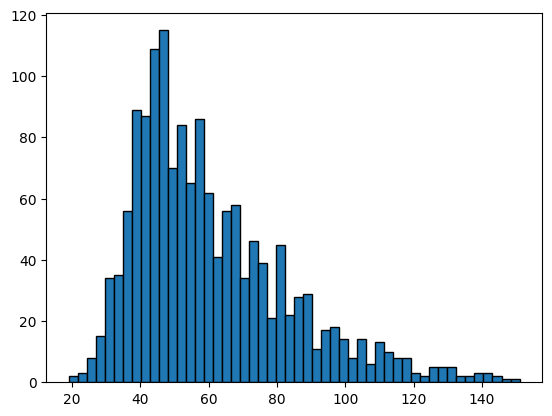

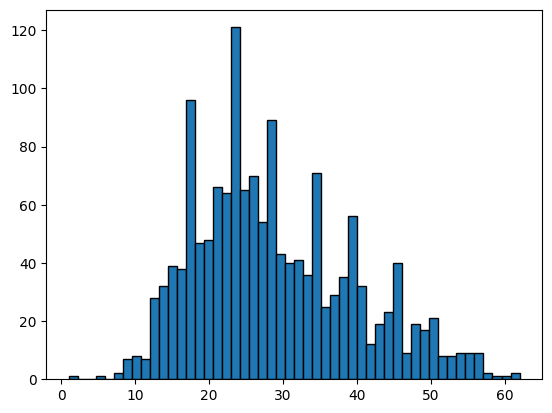

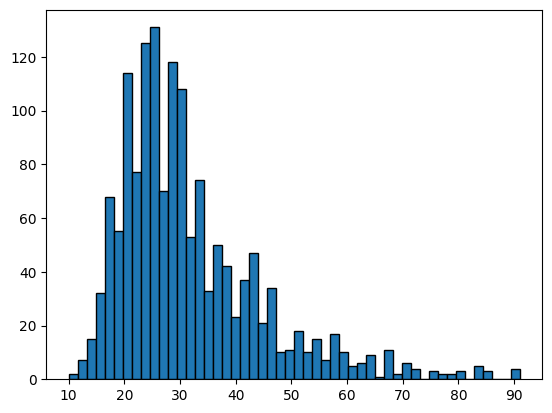

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(sampled_data['Acertos Totias'], bins=50, edgecolor='black')
plt.show()
plt.hist(sampled_data['Acertos Gerais'], bins=50, edgecolor='black')
plt.show()
plt.hist(sampled_data['Acertos Especificas'], bins=50, edgecolor='black')
plt.show()